<a href="https://colab.research.google.com/github/henrim666/ForexHistoricalDataCreator/blob/master/TensorFlowTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/structured_data/time_series

https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb



In [0]:
from google.colab import drive
drive.mount('/gdrive')
!ls -sla /gdrive/'My Drive'/5MFXDB/


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
total 772531
    31 -rw------- 1 root root     31279 Feb 13 04:50  boston_data.csv
  9052 -rw------- 1 root root   9269248 Mar  2 01:38 'Copy of TradeOrder201857new.db'
147132 -rw------- 1 root root 150663168 Feb 18 04:57 'FX2018all (1).db'
147132 -rw------- 1 root root 150663168 Feb 18 04:57  FX2018all.db
    16 -rw------- 1 root root     16384 Jan  8 09:49  OrderBook.db
  1640 -rw------- 1 root root   1679360 Mar 11 09:24  OverviewStatistics.db
   364 -rw------- 1 root root    372736 Jan 26 11:14  Portfolio.db
 58956 -rw------- 1 root root  60370944 Mar  6 01:02  TradeOrder001.db
 67524 -rw------- 1 root root  69144576 Mar  9 14:54  TradeOrder002.db
 17620 -rw------- 1 root root  18042880 Feb 21 10:35 'TradeOrder2018128.db '
  4628 -rw------- 1 root root   4739072 Feb 29 17:22  TradeOrder201821new.db
  4472 -rw------- 1 root root   4579328 Mar  1 11:52  TradeOrder201823n

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine

# Database connector
engine_type             = "sqlite:///"
databasedir             = '/gdrive/My Drive/5MFXDB/'
databasename1            = "TrainingSet002"
databasefileextension   = ".db"
engineSTR1=engine_type+databasedir+databasename1+databasefileextension
print(engineSTR1)
engine1 = create_engine(engineSTR1)

command1="""SELECT * FROM TrainingSet2018newY """ 
FXTrainingSets = pd.read_sql_query(command1, engine1)
print(float(FXTrainingSets.iloc[1]['high']))

t_min, t_max = 1, 2900
n_steps = 20
instance = 2000
n_inputs = 1
n_neurons = 100
n_outputs = 1
learning_rate = 0.001
n_iterations = 600 #1500
batch_size = 20  #50
#SelectedData='low'

traininglengthsample=t_max+n_steps
FXTrainingSet=pd.DataFrame()#columns=[SelectedData])
#FXTrainingSet[SelectedData]=FXTrainingSets[SelectedData].tail(traininglengthsample)
FXTrainingSet=FXTrainingSets.reset_index(drop=True)


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

zip_path    = tf.keras.utils.get_file(origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',fname='jena_climate_2009_2016.csv.zip',extract=True)
csv_path, _ = os.path.splitext(zip_path)

df = pd.read_csv(csv_path)
print("temp",len(df))
print("FXTrainingSet",len(FXTrainingSet))
print(FXTrainingSet.head())
print(df.head())

TensorFlow 2.x selected.
TensorFlow version: 2.1.0
Eager execution: True
sqlite:////gdrive/My Drive/5MFXDB/TrainingSet002.db
112.737
temp 420551
FXTrainingSet 2910
   level_0       DateTime  MACD  ...  tradecut  tradelength  tradeprofit
0       35  736696.413305   0.0  ...   112.711         32.0      112.868
1       87  736696.590278   0.0  ...   112.705         32.0      112.837
2      110  736696.670142   0.0  ...   112.613         32.0      112.760
3      126  736696.725698   0.0  ...   112.489         32.0      112.667
4      187  736696.937511   0.0  ...   112.108         32.0      112.258

[5 rows x 66 columns]
             Date Time  p (mbar)  T (degC)  ...  wv (m/s)  max. wv (m/s)  wd (deg)
0  01.01.2009 00:10:00    996.52     -8.02  ...      1.03           1.75     152.3
1  01.01.2009 00:20:00    996.57     -8.41  ...      0.72           1.50     136.1
2  01.01.2009 00:30:00    996.53     -8.51  ...      0.19           0.63     171.6
3  01.01.2009 00:40:00    996.51     -8.31 

In [0]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

TRAIN_SPLIT = 300000
tf.random.set_seed(13)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7613560b70>],
      dtype=object)

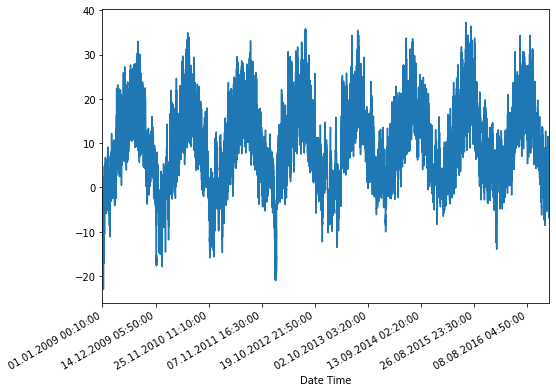

In [0]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()
uni_data.plot(subplots=True)


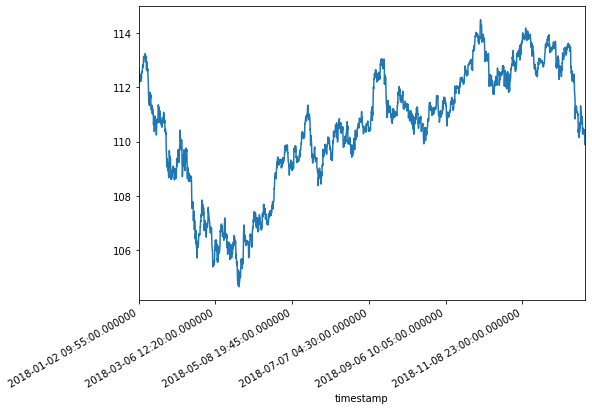

In [0]:
uni_dataFX = FXTrainingSet['close']
uni_dataFX.index = FXTrainingSet['timestamp']
uni_dataFX.head()
uni_dataFX.plot(subplots=True)


TRAIN_SPLITFX = 2000
#tf.random.set_seed(13)

In [0]:
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,univariate_past_history,univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,univariate_past_history,univariate_future_target)

print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]

 Target temperature to predict
-2.1041848598100876


In [0]:
uni_dataFX.values

array([112.734, 112.735, 112.622, ..., 110.236, 109.887, 109.98 ])

In [0]:
uni_dataFX = uni_dataFX.values
uni_trainFX_mean = uni_dataFX[:TRAIN_SPLITFX].mean()
uni_trainFX_std  = uni_dataFX[:TRAIN_SPLITFX].std()
uni_dataFX = (uni_dataFX-uni_trainFX_mean)/uni_trainFX_std
univariateFX_past_history = 20
univariateFX_future_target = 0

x_trainFX_uni, y_trainFX_uni = univariate_data(uni_dataFX, 0, TRAIN_SPLITFX,univariateFX_past_history,univariateFX_future_target)
x_valFX_uni, y_valFX_uni = univariate_data(uni_dataFX, TRAIN_SPLITFX, None,univariateFX_past_history,univariateFX_future_target)

print ('Single window of past history')
print (x_trainFX_uni[0])
print ('\n Target FX price to predict')
print (y_trainFX_uni[0])

Single window of past history
[[1.65305003]
 [1.65355072]
 [1.59697302]
 [1.53638983]
 [1.34913268]
 [1.41221931]
 [1.45077225]
 [1.41422206]
 [1.42774062]
 [1.420731  ]
 [1.46629357]
 [1.4247365 ]
 [1.43575163]
 [1.42974337]
 [1.39519593]
 [1.41472275]
 [1.41622481]
 [1.52887951]
 [1.43875575]
 [1.55942145]]

 Target FX price to predict
1.5514104524332502


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

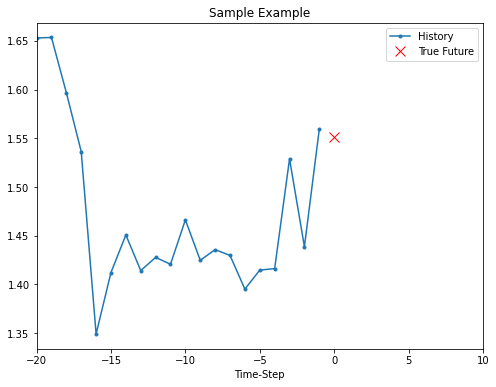

In [0]:
def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

#show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

show_plot([x_trainFX_uni[0], y_trainFX_uni[0]], 0, 'Sample Example')

In [0]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

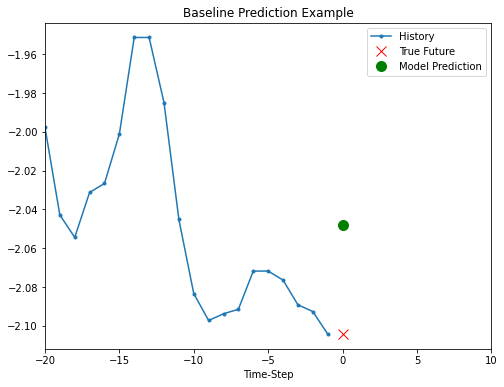

In [0]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,'Baseline Prediction Example')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

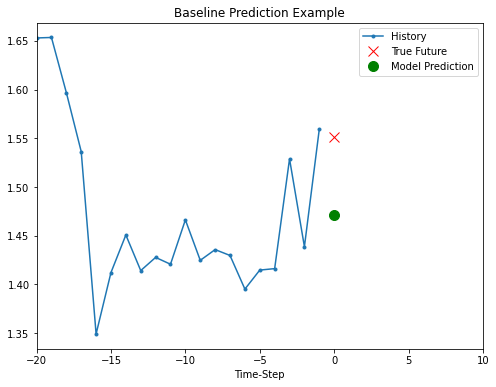

In [0]:
show_plot([x_trainFX_uni[0], y_trainFX_uni[0], baseline(x_trainFX_uni[0])], 0,'Baseline Prediction Example')

(256, 1)
Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 4s 19ms/step - loss: 0.2509 - val_loss: 0.2753
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0826 - val_loss: 0.1299
Epoch 3/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0695 - val_loss: 0.1069
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0621 - val_loss: 0.0896
Epoch 5/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0573 - val_loss: 0.0796
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0544 - val_loss: 0.0680
Epoch 7/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0526 - val_loss: 0.0579
Epoch 8/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0517 - val_loss: 0.0537
Epoch 9/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0511 - val_loss: 0.0559
Epoch 10/10
200/200 [==================

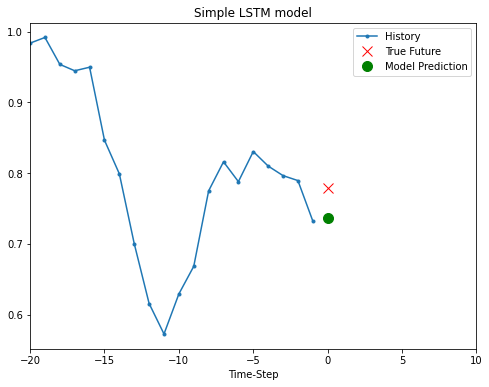

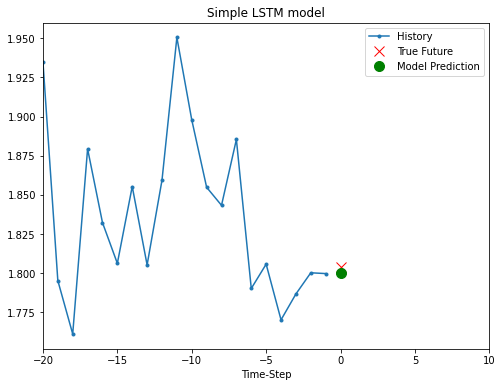

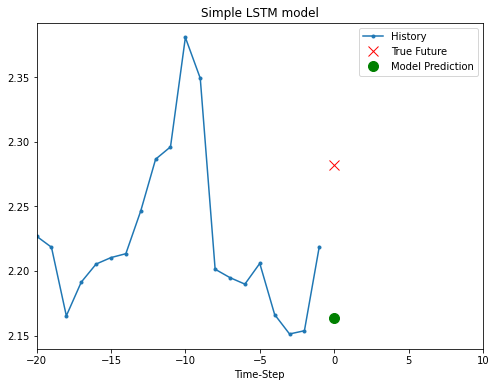

In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

BATCH_SIZEFX = 256
BUFFER_SIZEFX = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

train_univariateFX = tf.data.Dataset.from_tensor_slices((x_trainFX_uni, y_trainFX_uni))
train_univariateFX = train_univariateFX.cache().shuffle(BUFFER_SIZEFX).batch(BATCH_SIZEFX).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

val_univariateFX = tf.data.Dataset.from_tensor_slices((x_valFX_uni, y_valFX_uni))
val_univariateFX = val_univariateFX.batch(BATCH_SIZEFX).repeat()

#####################################


simple_lstm_modelFX = tf.keras.models.Sequential([tf.keras.layers.LSTM(8, input_shape=x_trainFX_uni.shape[-2:]),tf.keras.layers.Dense(1)])
simple_lstm_modelFX.compile(optimizer='adam', loss='mae')

for xFX, yFX in val_univariateFX.take(1):
    print(simple_lstm_modelFX.predict(xFX).shape)

EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_modelFX.fit(train_univariateFX, epochs=EPOCHS, steps_per_epoch=EVALUATION_INTERVAL, validation_data=val_univariateFX, validation_steps=50)    

for xFX, yFX in val_univariateFX.take(3):
  plot = show_plot([xFX[0].numpy(), yFX[0].numpy(),simple_lstm_modelFX.predict(xFX)[0]], 0, 'Simple LSTM model')
  plot.show()

                     p (mbar)  T (degC)  rho (g/m**3)
Date Time                                            
01.01.2009 00:10:00    996.52     -8.02       1307.75
01.01.2009 00:20:00    996.57     -8.41       1309.80
01.01.2009 00:30:00    996.53     -8.51       1310.24
01.01.2009 00:40:00    996.51     -8.31       1309.19
01.01.2009 00:50:00    996.51     -8.27       1309.00
                              close      low     high
timestamp                                            
2018-01-02 09:55:00.000000  112.734  112.721  112.768
2018-01-02 14:10:00.000000  112.735  112.715  112.737
2018-01-02 16:05:00.000000  112.622  112.623  112.660
2018-01-02 17:25:00.000000  112.501  112.499  112.567
2018-01-02 22:30:00.000000  112.127  112.118  112.158


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

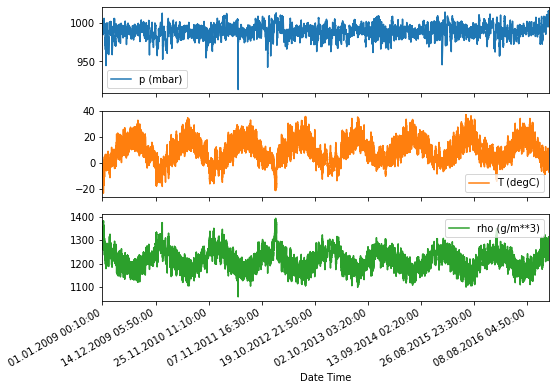

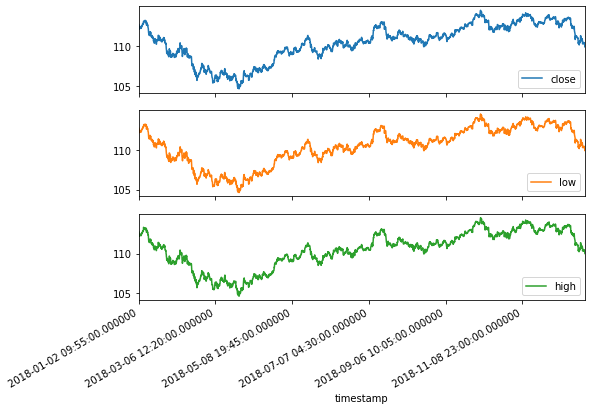

In [0]:
def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']
features = df[features_considered]
features.index = df['Date Time']
print(features.head())

featuresFX_considered = ['close', 'low', 'high']
featuresFX = FXTrainingSet[featuresFX_considered]
featuresFX.index = FXTrainingSet['timestamp']
print(featuresFX.head())

features.plot(subplots=True)
featuresFX.plot(subplots=True)

tf.random.set_seed(13)
TRAIN_SPLIT = 300000
TRAIN_SPLITFX = 2000
BATCH_SIZE = 256
BUFFER_SIZE = 10000
BATCH_SIZEFX = 256
BUFFER_SIZEFX = 10000
EVALUATION_INTERVAL = 200
EPOCHS = 10

In [0]:
featuresFX_considered = ['close', 'low', 'high']
featuresFX = FXTrainingSet[featuresFX_considered]
featuresFX.index = FXTrainingSet['timestamp']
print(featuresFX.head())

datasetFX      = featuresFX.values
datasetFX_mean = datasetFX[:TRAIN_SPLITFX].mean(axis=0)
datasetFX_std  = datasetFX[:TRAIN_SPLITFX].std(axis=0)
datasetFX      = (datasetFX-datasetFX_mean)/datasetFX_std

def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
  data = []
  labels = []
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  return np.array(data), np.array(labels)


past_history = 720
future_target = 72
STEP = 6

x_trainFX_single, y_trainFX_single = multivariate_data(datasetFX, datasetFX[:, 1], 0,TRAIN_SPLITFX,       past_history,future_target, STEP,single_step=True)
x_valFX_single,   y_valFX_single   = multivariate_data(datasetFX, datasetFX[:, 1]   ,TRAIN_SPLITFX, None, past_history,future_target, STEP,single_step=True)

print ('Single window of past history FX : {}'.format(x_trainFX_single[0].shape))

train_dataFX_single = tf.data.Dataset.from_tensor_slices((x_trainFX_single, y_trainFX_single))
train_dataFX_single = train_dataFX_single.cache().shuffle(BUFFER_SIZEFX).batch(BATCH_SIZEFX).repeat()

val_dataFX_single   = tf.data.Dataset.from_tensor_slices((x_valFX_single, y_valFX_single))
val_dataFX_single   = val_dataFX_single.batch(BATCH_SIZEFX).repeat()

single_step_modelFX = tf.keras.models.Sequential()
single_step_modelFX.add(tf.keras.layers.LSTM(32,input_shape=x_trainFX_single.shape[-2:]))
single_step_modelFX.add(tf.keras.layers.Dense(1))
single_step_modelFX.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for xFX, yFX in val_dataFX_single.take(1):
  print(single_step_modelFX.predict(xFX).shape)

single_step_historyFX = single_step_modelFX.fit(train_dataFX_single, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_dataFX_single,validation_steps=50)

                              close      low     high
timestamp                                            
2018-01-02 09:55:00.000000  112.734  112.721  112.768
2018-01-02 14:10:00.000000  112.735  112.715  112.737
2018-01-02 16:05:00.000000  112.622  112.623  112.660
2018-01-02 17:25:00.000000  112.501  112.499  112.567
2018-01-02 22:30:00.000000  112.127  112.118  112.158
Single window of past history FX : (120, 3)
(118, 1)
Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 23s 117ms/step - loss: 0.2340 - val_loss: 0.5105
Epoch 2/10
200/200 [==============================] - 22s 110ms/step - loss: 0.1728 - val_loss: 0.5062
Epoch 3/10
200/200 [==============================] - 22s 110ms/step - loss: 0.1323 - val_loss: 0.4933
Epoch 4/10
200/200 [==============================] - 22s 110ms/step - loss: 0.1093 - val_loss: 0.4939
Epoch 5/10
200/200 [==============================] - 22s 112ms/step - loss: 0.1025 - val_loss: 0.4953
Epoch 6/10


In [0]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']
features = df[features_considered]
features.index = df['Date Time']
print(features.head())

dataset        = features.values
data_mean      = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std       = dataset[:TRAIN_SPLIT].std(axis=0)
dataset        = (dataset-data_mean)/data_std

def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
  data = []
  labels = []
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  return np.array(data), np.array(labels)

past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single   = multivariate_data(dataset, dataset[:, 1], 0,TRAIN_SPLIT,         past_history,future_target, STEP,single_step=True)
x_val_single,   y_val_single     = multivariate_data(dataset, dataset[:, 1]   ,TRAIN_SPLIT, None,   past_history,future_target, STEP,single_step=True)

print ('Single window of past history : {}'.format(x_train_single[0].shape))

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_single,validation_steps=50)

                     p (mbar)  T (degC)  rho (g/m**3)
Date Time                                            
01.01.2009 00:10:00    996.52     -8.02       1307.75
01.01.2009 00:20:00    996.57     -8.41       1309.80
01.01.2009 00:30:00    996.53     -8.51       1310.24
01.01.2009 00:40:00    996.51     -8.31       1309.19
01.01.2009 00:50:00    996.51     -8.27       1309.00
Single window of past history : (120, 3)
(256, 1)
Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 25s 123ms/step - loss: 0.3251 - val_loss: 0.2670
Epoch 2/10
200/200 [==============================] - 23s 114ms/step - loss: 0.2656 - val_loss: 0.2621
Epoch 3/10
200/200 [==============================] - 23s 117ms/step - loss: 0.2618 - val_loss: 0.2507
Epoch 4/10
200/200 [==============================] - 24s 119ms/step - loss: 0.2600 - val_loss: 0.2499
Epoch 5/10
200/200 [==============================] - 24s 118ms/step - loss: 0.2284 - val_loss: 0.2403
Epoch 6/10
200

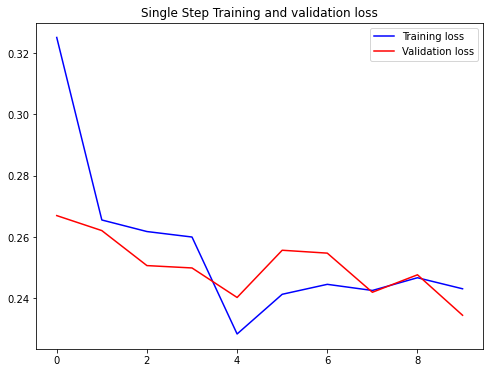

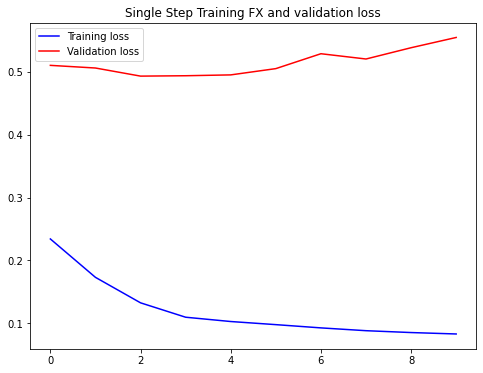

In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

plot_train_history(single_step_history,'Single Step Training and validation loss')

plot_train_history(single_step_historyFX,'Single Step Training FX and validation loss')

predict 1.442300216504111
predict [1.1723983]


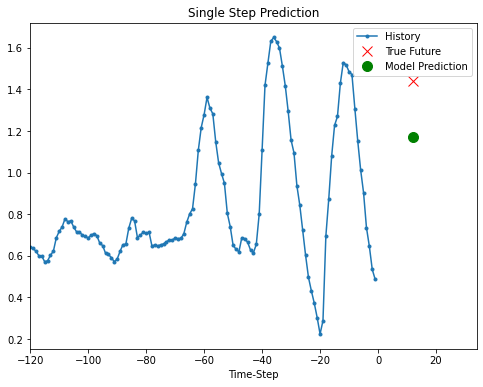

predict 0.7846431732959932
predict [0.6216305]


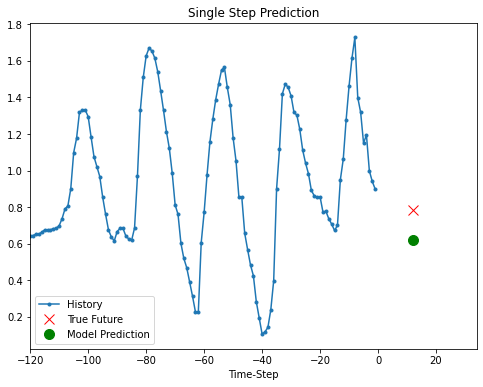

predict 0.20340402595360732
predict [0.14974433]


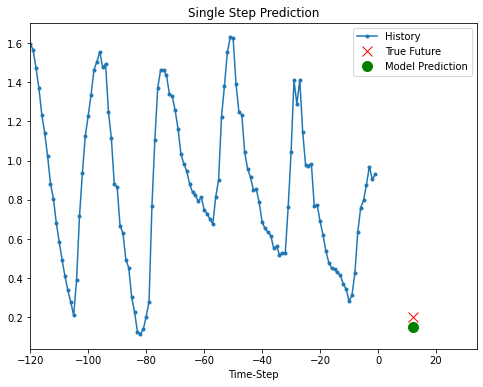

predict 2.0096976243198186
predict [0.59776855]


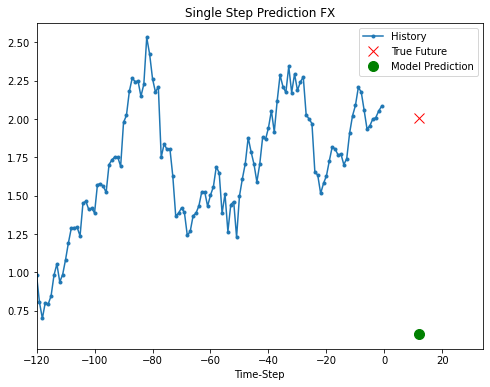

predict 2.0096976243198186
predict [0.59776855]


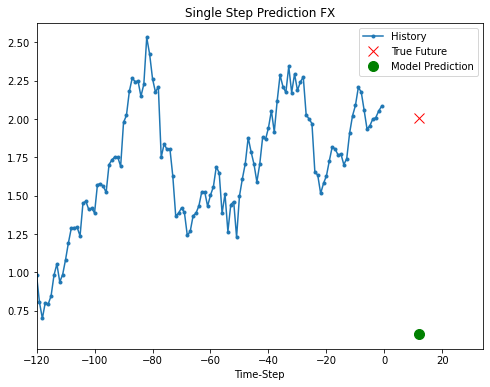

predict 2.0096976243198186
predict [0.59776855]


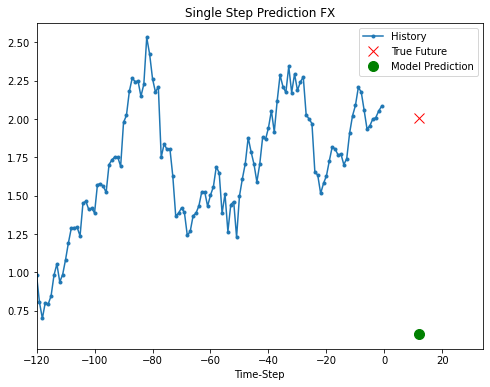

In [0]:
for x, y in val_data_single.take(3):
  print("predict",y[0].numpy())
  print("predict",single_step_model.predict(x)[0])
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),single_step_model.predict(x)[0]], 12,'Single Step Prediction')
  plot.show()

for xFX, yFX in val_dataFX_single.take(3):
  print("predict",yFX[0].numpy())
  print("predict",single_step_modelFX.predict(xFX)[0])
  plot = show_plot([xFX[0][:, 1].numpy(), yFX[0].numpy(),single_step_modelFX.predict(xFX)[0]], 12,'Single Step Prediction FX')
  plot.show()

In [0]:
future_target = 72
x_train_multi,   y_train_multi   = multivariate_data(dataset,   dataset[:, 1]  , 0,TRAIN_SPLIT,   past_history,future_target,       STEP)
x_val_multi,     y_val_multi     = multivariate_data(dataset,   dataset[:, 1]  ,TRAIN_SPLIT,      None, past_history,future_target, STEP)

x_trainFX_multi, y_trainFX_multi = multivariate_data(datasetFX, datasetFX[:, 1], 0,TRAIN_SPLITFX, past_history,future_target,       STEP)
x_valFX_multi,   y_valFX_multi   = multivariate_data(datasetFX, datasetFX[:, 1],TRAIN_SPLITFX,    None, past_history,future_target, STEP)

In [0]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

print ('Single window of past history FX : {}'.format(x_trainFX_multi[0].shape))
print ('\n Target FX to predict : {}'.format(y_trainFX_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)
Single window of past history FX : (120, 3)

 Target FX to predict : (72,)


In [0]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

train_dataFX_multi = tf.data.Dataset.from_tensor_slices((x_trainFX_multi, y_trainFX_multi))
train_dataFX_multi = train_dataFX_multi.cache().shuffle(BUFFER_SIZEFX).batch(BATCH_SIZEFX).repeat()

val_dataFX_multi = tf.data.Dataset.from_tensor_slices((x_valFX_multi, y_valFX_multi))
val_dataFX_multi = val_dataFX_multi.batch(BATCH_SIZEFX).repeat()

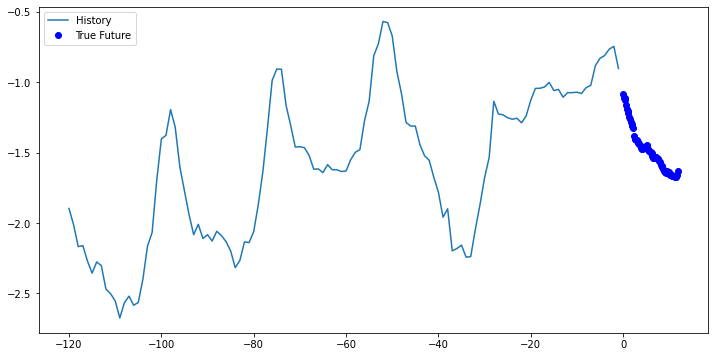

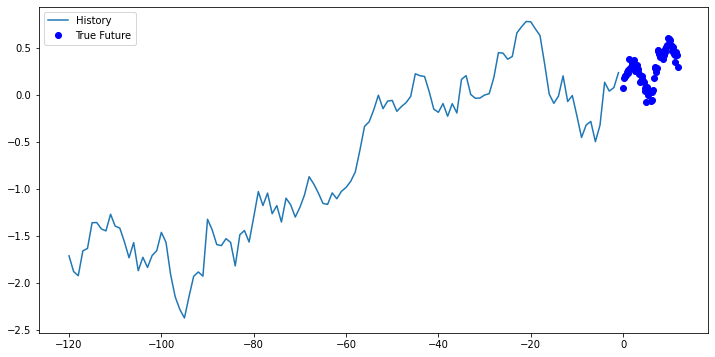

In [0]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))  

for xFX, yFX in train_dataFX_multi.take(1):
  multi_step_plot(xFX[0], yFX[0], np.array([0]))  

  

In [0]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,return_sequences=True,input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,validation_steps=50)


(256, 72)
Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 41s 205ms/step - loss: 0.6547 - val_loss: 0.3200
Epoch 2/10
200/200 [==============================] - 40s 200ms/step - loss: 0.3541 - val_loss: 0.2808
Epoch 3/10
200/200 [==============================] - 40s 202ms/step - loss: 0.3480 - val_loss: 0.2664
Epoch 4/10
200/200 [==============================] - 40s 200ms/step - loss: 0.2662 - val_loss: 0.2321
Epoch 5/10
200/200 [==============================] - 40s 199ms/step - loss: 0.2077 - val_loss: 0.2152
Epoch 6/10
200/200 [==============================] - 40s 200ms/step - loss: 0.2157 - val_loss: 0.2237
Epoch 7/10
200/200 [==============================] - 42s 212ms/step - loss: 0.2053 - val_loss: 0.2114
Epoch 8/10
200/200 [==============================] - 42s 210ms/step - loss: 0.2015 - val_loss: 0.1988
Epoch 9/10
200/200 [==============================] - 42s 211ms/step - loss: 0.2018 - val_loss: 0.1979
Epoch 10/10
200/200 

In [0]:
multi_stepFX_model = tf.keras.models.Sequential()
multi_stepFX_model.add(tf.keras.layers.LSTM(32,return_sequences=True,input_shape=x_trainFX_multi.shape[-2:]))
multi_stepFX_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_stepFX_model.add(tf.keras.layers.Dense(72))

multi_stepFX_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

for xFX, yFX in val_dataFX_multi.take(1):
  print (multi_stepFX_model.predict(xFX).shape)

multi_stepFX_history = multi_stepFX_model.fit(train_dataFX_multi, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_dataFX_multi,validation_steps=50)

(118, 72)
Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 41s 203ms/step - loss: 1204.7329 - val_loss: 23.0806
Epoch 2/10
200/200 [==============================] - 38s 191ms/step - loss: 0.2539 - val_loss: 23119.3418
Epoch 3/10
200/200 [==============================] - 38s 192ms/step - loss: 2688683376.8838 - val_loss: 2.1177
Epoch 4/10
200/200 [==============================] - 41s 204ms/step - loss: 0.2375 - val_loss: 2.6015
Epoch 5/10
200/200 [==============================] - 39s 193ms/step - loss: 0.2351 - val_loss: 24524.8281
Epoch 6/10
200/200 [==============================] - 39s 194ms/step - loss: 1377373389.0363 - val_loss: 62.1743
Epoch 7/10
200/200 [==============================] - 39s 193ms/step - loss: 0.2227 - val_loss: 57.8082
Epoch 8/10
200/200 [==============================] - 39s 193ms/step - loss: 0.2093 - val_loss: 1.9171
Epoch 9/10
200/200 [==============================] - 38s 191ms/step - loss: 0.2163 - val_l

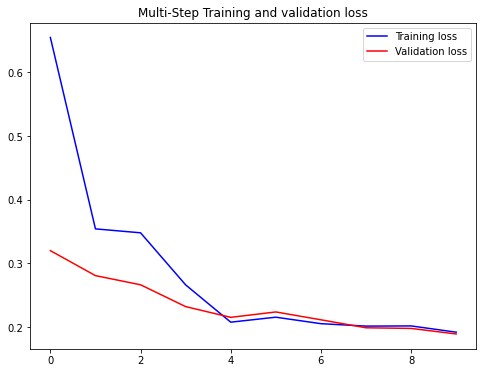

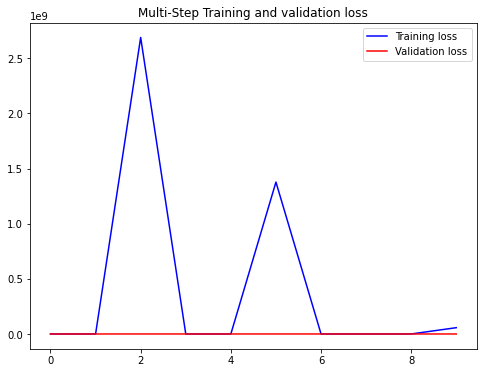

In [0]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')
plot_train_history(multi_stepFX_history, 'Multi-Step Training and validation loss')

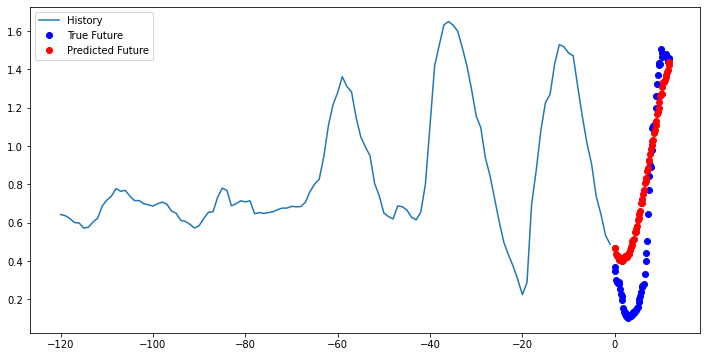

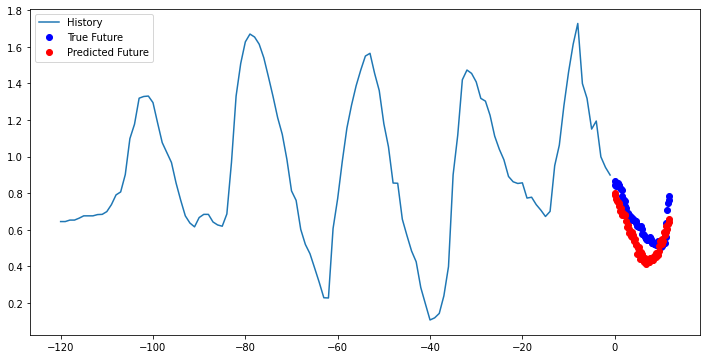

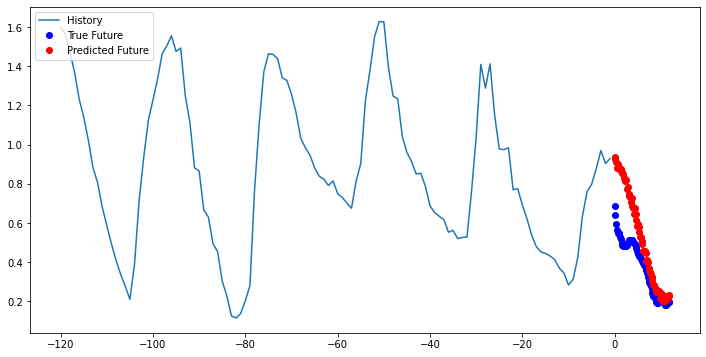

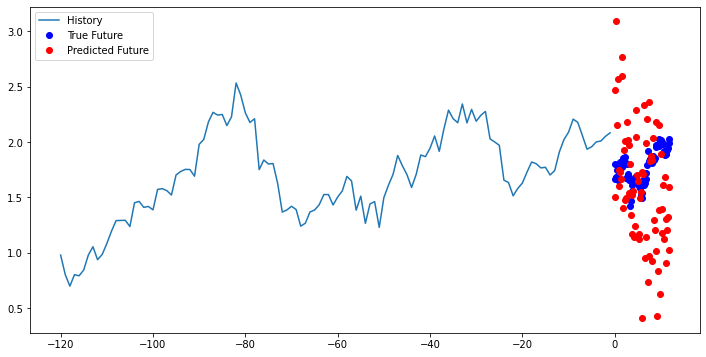

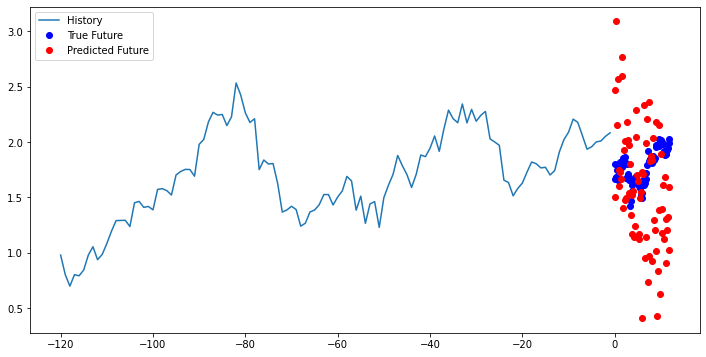

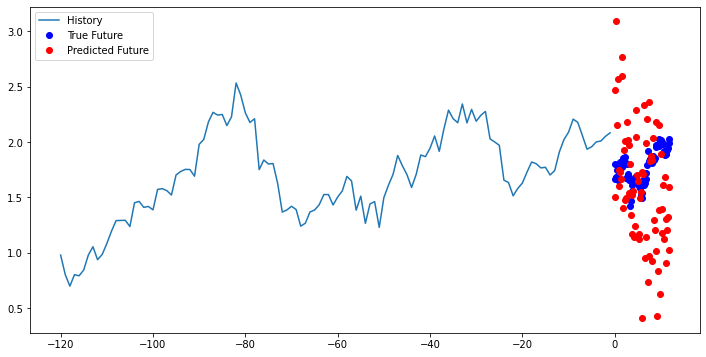

In [0]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

for xFX, yFX in val_dataFX_multi.take(3):
  multi_step_plot(xFX[0], yFX[0], multi_stepFX_model.predict(xFX)[0])  